### Example of using the Bayesian optimisation package in 1D. This script utilises batch sampling, but not bounds reduction or sub-batch sampling.

In [1]:
import os

os.chdir('/work4/clf/jordanlee/Hyades/BayesianOptimisation')

import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BOPackage

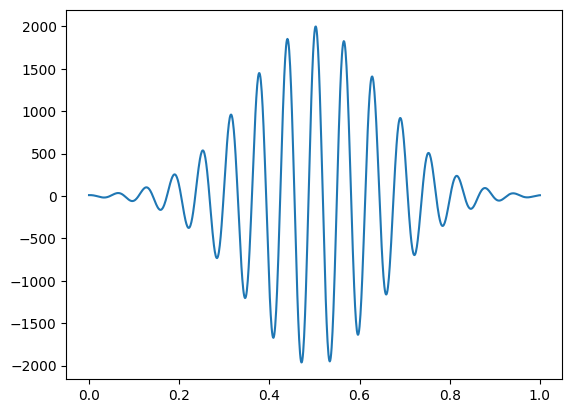

In [2]:
"""
Define the objective function.
"""

def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

X = np.linspace(0, 1, 1001, endpoint=True).reshape(1001, 1)

plt.plot(X[:, 0], ObjectiveFunction(X))

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.02             # Note, the length scale is the length scale after standardisation (setting the mean to 0 and standard deviation to 1)

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 10                  # Maximum kappa value used in the acquisition function for the batch
min_kappa = 0.1                 # Minimum kappa value used in the acquisition function for the batch

bounds = np.array([[0, 1]])
acquisition_samples = 1000        # Number of random points in the domain to calculate the acqusition function value at. The point with the highest acquisition function value will be added to the raw_X for the batch

random_seed = None                # random seed for reproducability if wanted. 

# Create the object
bo = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                  random_seed=random_seed)

In [4]:
"""
Get first random batch and update the optimiser.
"""

raw_X = bo.GetRandomXBatch(batch_size=4)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

bo.X_data, bo.y_data

(array([[0.43722482],
        [0.59751111],
        [0.45997176],
        [0.87178852]]),
 array([[ 1776.88248793],
        [-1629.4736127 ],
        [ -830.35763646],
        [   73.87431991]]))

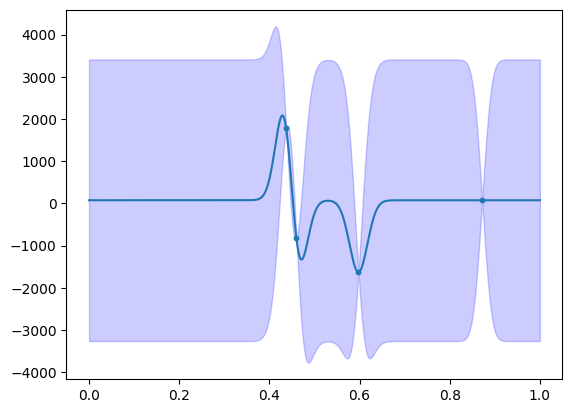

In [5]:
mean, variance = bo.PredictMeanVariance(X, normalised=False)

# # Plot the mean and the confidence interval
plt.plot(X, mean, label='mean')
plt.fill_between(X[:,0], mean[:,0] - 1.96 * np.sqrt(variance[:,0]), mean[:,0] + 1.96 * np.sqrt(variance[:,0]), color = 'blue', alpha=0.2, label = '95% confidence interval')

# Scatter plot of X_data and y_data
plt.scatter(bo.X_data, bo.y_data, s=10)

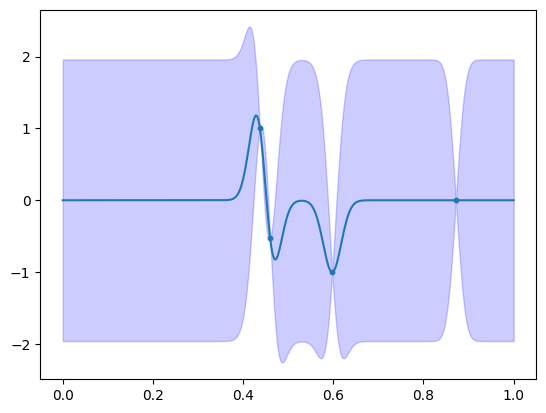

In [6]:
# Normalise the y_data for consistency in Gaussian Process calculations
if np.max(bo.y_data) - np.min(bo.y_data) != 0.0:
    normalised_y_data = 2 * (bo.y_data - np.min(bo.y_data)) / (np.max(bo.y_data) - np.min(bo.y_data)) - 1
else:
    normalised_y_data = bo.y_data

if bo.minimise is True:
    normalised_y_data = -normalised_y_data

normalised_mean, normalised_variance = bo.PredictMeanVariance(X, normalised=True)


# Plot the mean and the confidence interval
plt.plot(X, normalised_mean, label='mean')
plt.fill_between(X[:,0], normalised_mean[:,0] - 1.96 * np.sqrt(normalised_variance[:,0]), normalised_mean[:,0] + 1.96 * np.sqrt(normalised_variance[:,0]), color = 'blue', alpha=0.2, label = '95% confidence interval')

# Scatter plot of X_data and y_data
plt.scatter(bo.X_data, normalised_y_data, s=10)

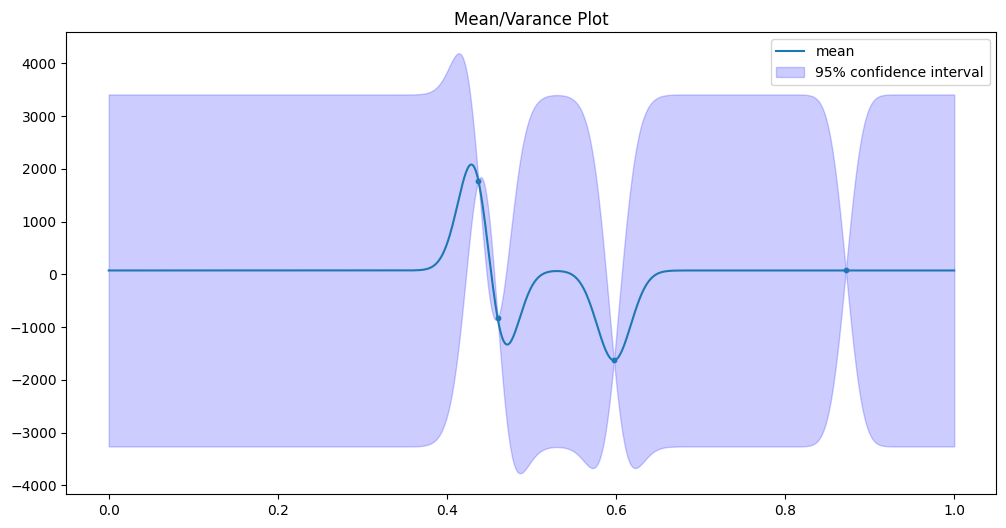

In [7]:
"""
Take a look at the mean and variance of the function now we have some data
"""

BOPackage.SausagePlot(bo)

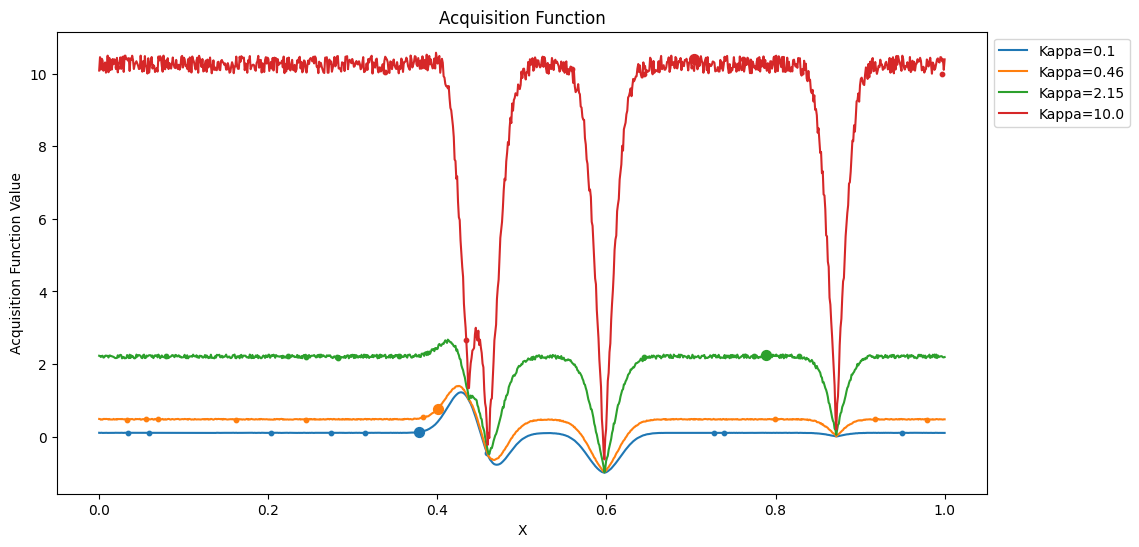

In [8]:
"""
Plot the Acquisition function for a range of kappas and demonstrate how the next point is selected.

'n_sample' random X values are selected and the one which returns the largest acqusition function value
is chosen for each kappa value. Assuming no 'sub batches' are used, there will be 'batch_size' kappa 
values and a point in X will be selected for each kappa value.
"""

raw_X = BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=max_kappa, min_kappa=min_kappa)

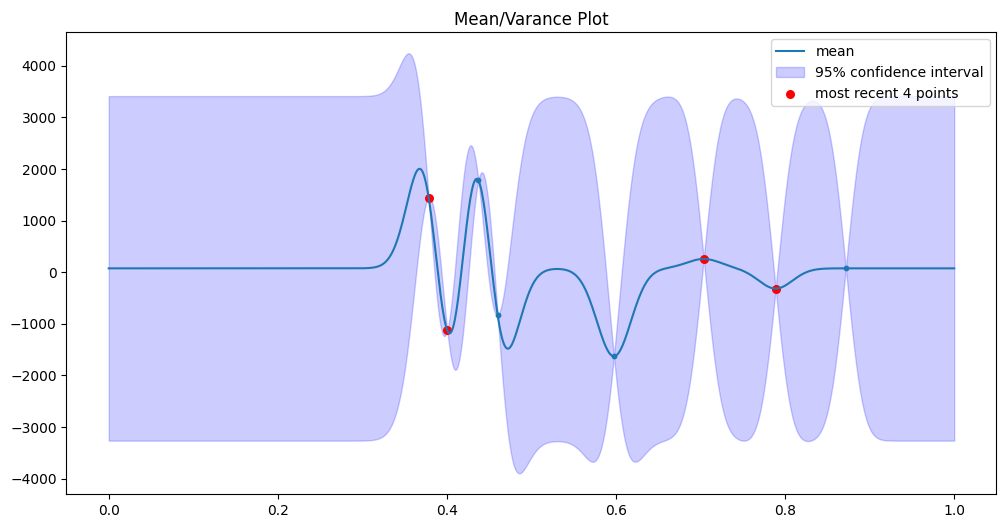

In [10]:
"""
Now select the next batch of X values using the acquisition function (not random) and update the optimiser.
"""

# batch_size = 4
# raw_X = bo.GetNextXBatch(batch_size=batch_size, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=len(raw_X))

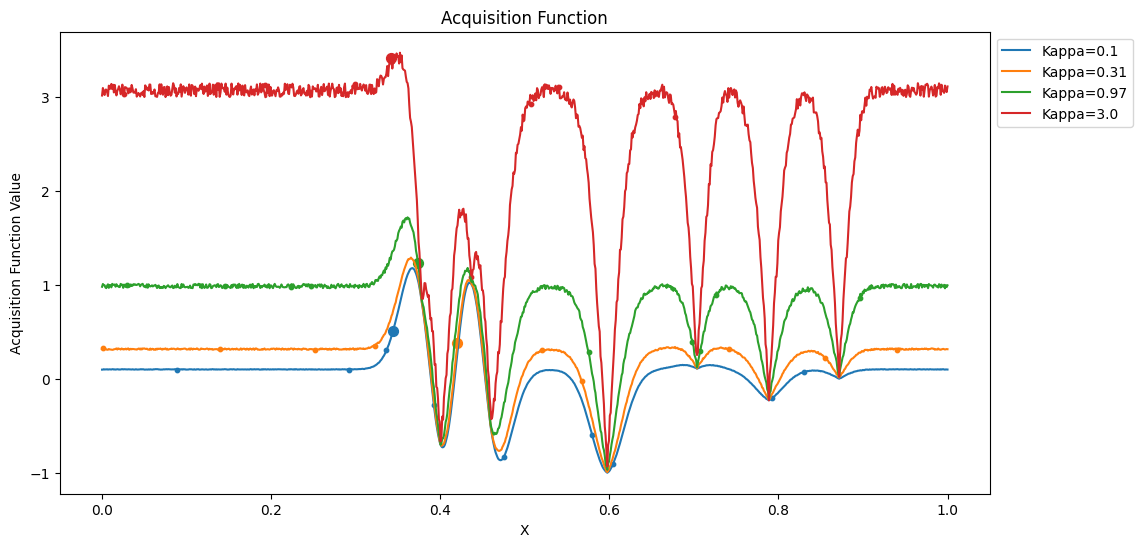

In [11]:
"""
Again lets looks at the acquisition function and how our next X set is selected.
"""
raw_X = BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

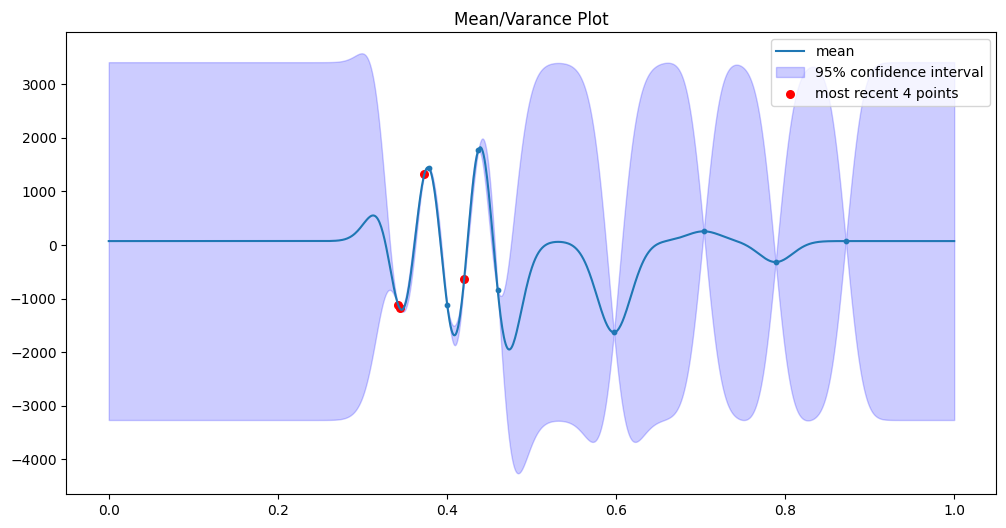

In [12]:
"""
Final example of doing this again.
"""
# batch_size = 4

# raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=len(raw_X))

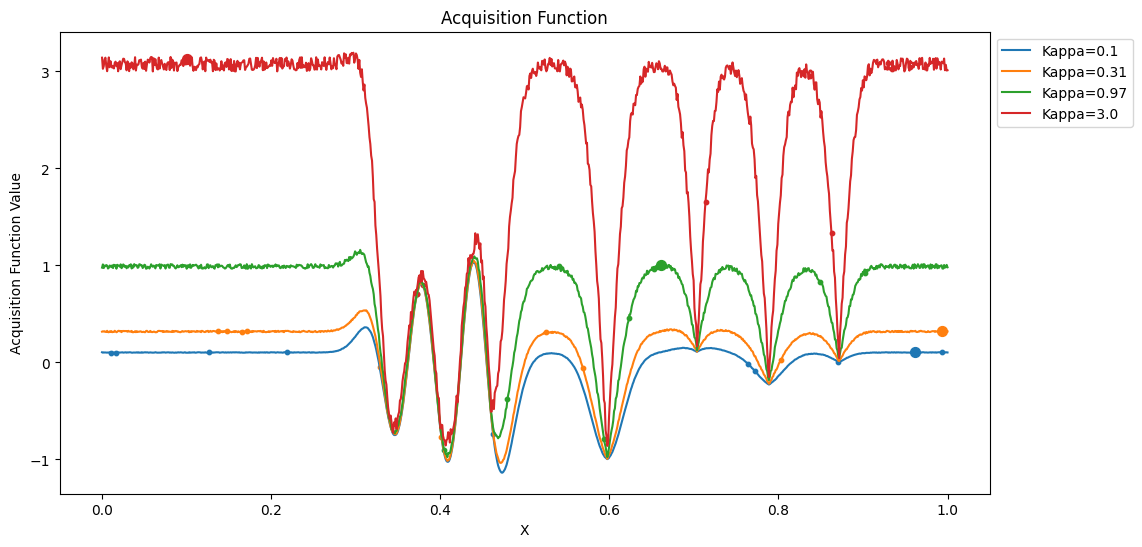

In [13]:
raw_X = BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

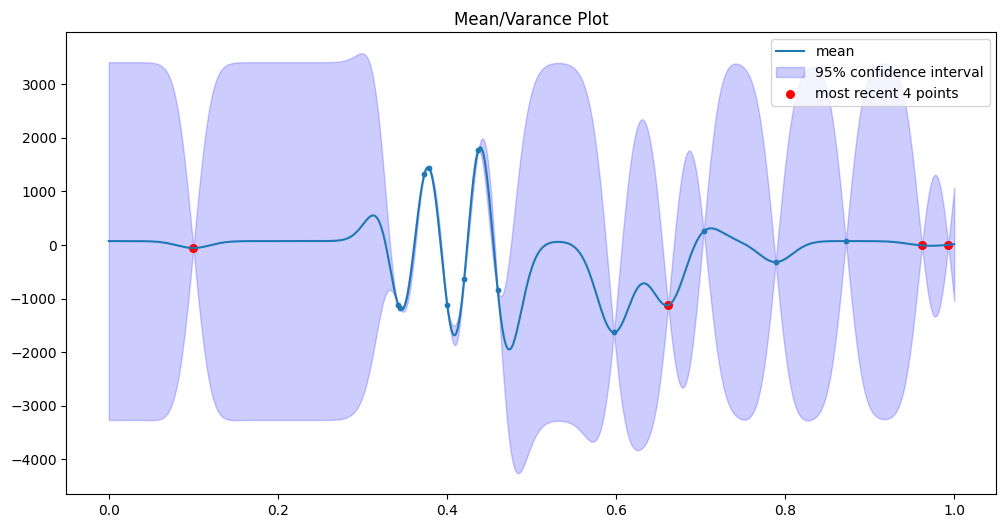

In [14]:
"""
Final example of doing this again.
"""
# batch_size = 4

# raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=len(raw_X))

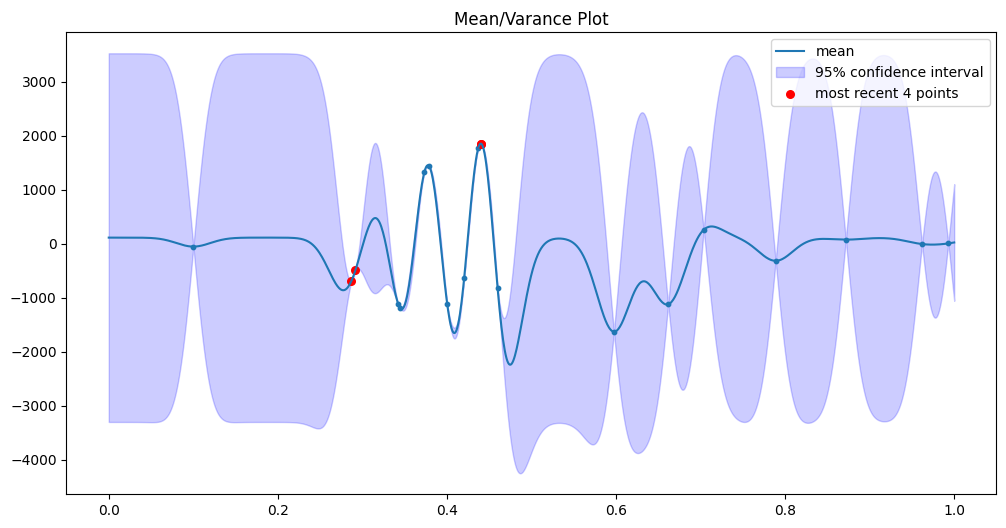

In [15]:
"""
Final example of doing this again.
"""
batch_size = 4

raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=len(raw_X))

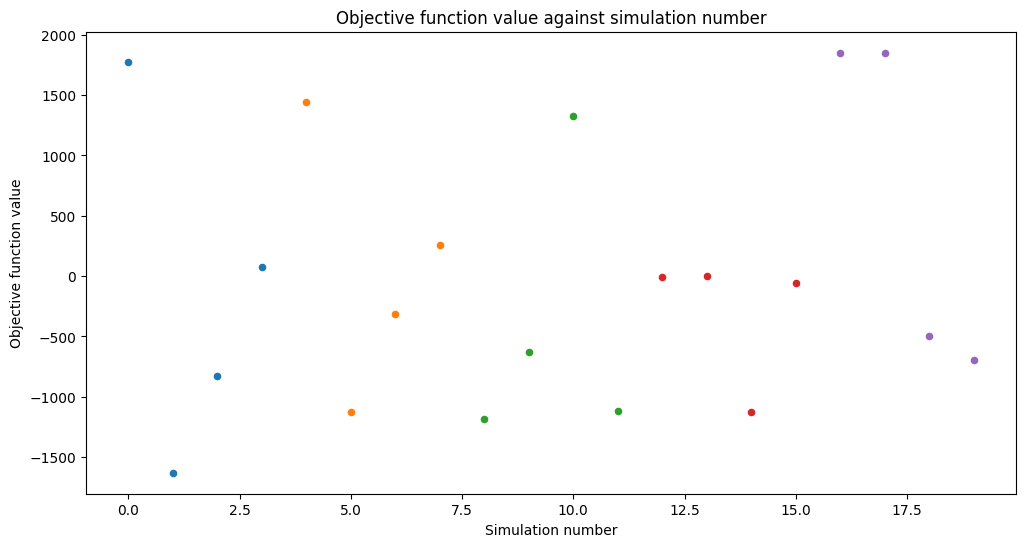

In [16]:
BOPackage.PlotData(bo)